# Import Libraries

In [1]:
import mesa
import numpy as np
from swarm_model import SwarmModel
from entity_classes.target import Target

from IPython import display
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Visualize Model

MovieWriter ffmpeg unavailable; using Pillow instead.


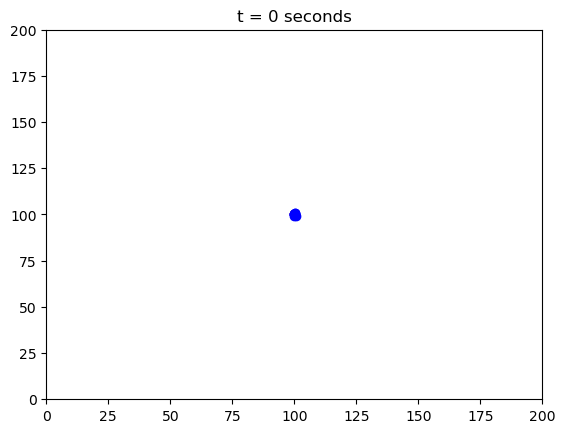

In [3]:
model = SwarmModel(
    n_drones = 10, 
    domain_width = 200, 
    domain_height = 200, 
    drone_diameter = 1, 
    target_vis_radius = 30,
    drone_vis_radius = 20,
    drone_weapon_radius = 15
)

# create a figure and axis objects
fig, ax = plt.subplots()

# set axis limits
ax.set_xlim([0, 200])
ax.set_ylim([0, 200])

# plot the target as a red circle
target_x, target_y = model.schedule.agents[model.target_id].pos
ax.plot(target_x, target_y, 'ro')

# plot all the drones as blue circles
for drone in model.schedule.agents:
    if isinstance(drone, Target): continue
    drone_x, drone_y = drone.pos
    ax.plot(drone_x, drone_y, 'bo')

# function to update the plot at each time step
def animate(i):
    # step the model
    model.step()
    
    # clear the axis
    ax.clear()
    
    # set axis limits
    ax.set_xlim([0, 200])
    ax.set_ylim([0, 200])
    
    # plot the target as a red circle
    target_x, target_y = model.schedule.agents[model.target_id].pos
    ax.plot(target_x, target_y, 'ro')
    ax.set_title(f"t = {i} seconds")

    # plot all the drones as blue circles
    for drone in model.schedule.agents:
        if isinstance(drone, Target): continue
        drone_x, drone_y = drone.pos
        ax.plot(drone_x, drone_y, 'bo')

# create the animation
animation = FuncAnimation(fig, animate, frames=350, interval=50)

animation.save("animation.gif")